In [1]:
!pip install tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install scikit-plot


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import pandas as pd
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, top_k_accuracy_score, ConfusionMatrixDisplay
from sklearn import metrics
from scikitplot.metrics import plot_roc_curve

import matplotlib.pyplot as plt
df = pd.read_csv('data.csv')

In [4]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
df = df.drop("id", axis = 1)
print(df.shape)

(569, 32)


In [6]:
df = df.drop(df.columns[31], axis = 1)
df.rename(columns = {"diagnosis": "target"}, inplace = True)
df["target"] = [1 if i.strip() == 'M' else 0 for i in df["target"]]

In [7]:
labels = df["target"].values

In [8]:
df = df.drop("target", axis = 1)

In [9]:
scaler = preprocessing.StandardScaler()
df_scaled = scaler.fit_transform(df)

In [10]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(df_scaled, labels, test_size = 0.3, random_state = 42)

# KNN


In [11]:
import statistics
class my_knn():
    def __init__(self,k=3,distance="euclidean"):
        self.k=k
        self.distance=distance
    def dis(self,x,y):
        if self.distance=="euclidean":
            return np.sqrt(np.sum((x-y)**2))
        elif self.distance=="manhattan":
            return sum(abs(x[i] - y[i]) for i in range(len(x)))
    def fit(self,x,y):
        self.x=x
        self.y=y
        
    def predict(self,test):
        pred=[]
        for t in test:
            temp_dis=[]
            classes=[]
            for i in range(self.x.shape[0]):
                temp_dis.append(self.dis(self.x[i],t))
            temp_dis=np.array(temp_dis)
            
            top_indices = np.argsort(temp_dis)
            
            topk=top_indices[:self.k]
            
            for ind in topk:
                classes.append(self.y[ind])
            pred.append(statistics.mode(classes))
        return pred

## Feature Selection i.e 5% MLP, 20% MLP, Low SVD, High SVD

In [12]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from keras.optimizers import Adam

In [13]:


# Define the autoencoder model

n_components = X_Train.shape[1]
#5 percent 
encoding_dim = int(n_components * 0.05)

input_layer = Input(shape=(n_components,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(n_components, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

# Use binary crossentropy loss and Adam optimizer
loss = 'binary_crossentropy'
optimizer = Adam(lr=0.001)

autoencoder.compile(optimizer=optimizer, loss=loss)

# Train the autoencoder model
batch_size = 32
epochs = 100

autoencoder.fit(X_Train, X_Train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(X_Test, X_Test))

# Define the encoder model and encode the training data
encoder_model = Model(inputs=input_layer, outputs=encoded)
XT5per_train = encoder_model.predict(X_Train)
XT5per_test = encoder_model.predict(X_Test)
#20 percent
encoding_dim = int(n_components * 0.20)

input_layer = Input(shape=(n_components,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(n_components, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

# Use binary crossentropy loss and Adam optimizer
loss = 'binary_crossentropy'
optimizer = Adam(lr=0.001)

autoencoder.compile(optimizer=optimizer, loss=loss)

# Train the autoencoder model
batch_size = 32
epochs = 100

autoencoder.fit(X_Train, X_Train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(X_Test, X_Test))

# Define the encoder model and encode the training data
encoder_model = Model(inputs=input_layer, outputs=encoded)
XT20per_train = encoder_model.predict(X_Train)
XT20per_test = encoder_model.predict(X_Test)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
13/13 [==============================] - 1s 21ms/step - loss: 0.7165 - val_loss: 0.7112
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 0.7041 - val_loss: 0.6992
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6931 - val_loss: 0.6883
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6828 - val_loss: 0.6782
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6734 - val_loss: 0.6681
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6638 - val_loss: 0.6581
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6538 - val_loss: 0.6474
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6429 - val_loss: 0.6353
Epoch 9/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6298 - val_loss: 0.6202
Epoch 10/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6127 - val_loss: 0.6001
Epoch 11

In [14]:
U, s, Vt = np.linalg.svd(X_Train)
s

array([71.33212882, 48.72342029, 34.03066065, 27.28135998, 24.85102433,
       22.23985701, 16.77813259, 14.13100116, 12.29737976, 11.82881623,
       11.04351368, 10.13850712,  9.71430874,  7.74621398,  5.79127113,
        5.15022523,  4.98105726,  4.6466699 ,  4.47225323,  3.49893937,
        3.26221837,  3.2271615 ,  3.01032068,  2.6400588 ,  2.40735884,
        1.71908862,  1.5957388 ,  0.76698407,  0.55139074,  0.21550182])

Based on the singlular values, I would choose one component for low_SVD and eight components for high_SVD

In [15]:
from sklearn.decomposition import TruncatedSVD
low_comp = 1
high_comp=8

# Create a TruncatedSVD object and fit it to X_train
svd_low = TruncatedSVD(n_components=low_comp)
svd_high = TruncatedSVD(n_components=high_comp)
svd_low.fit(X_Train)
svd_high.fit(X_Train)
# Transform X_train to the reduced dimensionality
X_train_low  = svd_low.transform(X_Train)
X_train_high = svd_high.transform(X_Train)
X_test_low  = svd_low.transform(X_Test)
X_test_high  = svd_high.transform(X_Test)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

e_neigh = my_knn(k=5, distance='euclidean')
e_neigh.fit(XT20per_train, Y_Train)

y_pred_knn=e_neigh.predict(XT20per_test)
accuracy_score(Y_Test, y_pred_knn)

0.9473684210526315

Now we will do cross validation on all eight models which have 2 distance functions and four feature representations

In [17]:
import numpy as np

def cv(X, y, k, cv , distance, eval_metric):

    n = X.shape[0]
    fold_size = int(np.ceil(n / cv))
    scores = []
    for i in range(cv):
        # Split the data into training and validation sets
        start, end = i * fold_size, min((i + 1) * fold_size, n)
        X_train = np.concatenate((X[:start], X[end:]), axis=0)
        y_train = np.concatenate((y[:start], y[end:]), axis=0)
        X_val, y_val = X[start:end], y[start:end]
        model=my_knn(k=k,distance=distance)
        # Fit the model on the training set
        model.fit(X_train, y_train)

        # Evaluate the model on the validation set
        y_pred = model.predict(X_val)
        score = eval_metric(y_val, y_pred)
        scores.append(score)

    return scores


In [18]:
print(XT5per_train.shape)
print(XT20per_train.shape)
print(X_train_low.shape)
print(X_train_high.shape)

(398, 1)
(398, 6)
(398, 1)
(398, 8)


accuracy_score, f1_score, precision_score, recall_score

In [19]:
accuracy_euclidean_SVD_low = cv(X_train_low, Y_Train, 5 , 10 , "euclidean", accuracy_score)
accuracy_euclidean_SVD_high = cv(X_train_high, Y_Train, 5 , 10 , "euclidean", accuracy_score)
accuracy_euclidean_MLP_5 = cv(XT5per_train, Y_Train, 5 , 10 , "euclidean", accuracy_score)
accuracy_euclidean_MLP_20 = cv(XT20per_train, Y_Train, 5 , 10 , "euclidean", accuracy_score)
accuracy_manhattan_SVD_low = cv(X_train_low, Y_Train, 5 , 10 , "manhattan", accuracy_score)
accuracy_manhattan_SVD_high = cv(X_train_high, Y_Train, 5 , 10 , "manhattan", accuracy_score)
accuracy_manhattan_MLP_5 = cv(XT5per_train, Y_Train, 5 , 10 , "manhattan", accuracy_score)
accuracy_manhattan_MLP_20 = cv(XT20per_train, Y_Train, 5 , 10 , "manhattan", accuracy_score)

In [20]:
f1_score_euclidean_SVD_low = cv(X_train_low, Y_Train, 5 , 10 , "euclidean", f1_score)
f1_score_euclidean_SVD_high = cv(X_train_high, Y_Train, 5 , 10 , "euclidean", f1_score)
f1_score_euclidean_MLP_5 = cv(XT5per_train, Y_Train, 5 , 10 , "euclidean", f1_score)
f1_score_euclidean_MLP_20 = cv(XT20per_train, Y_Train, 5 , 10 , "euclidean", f1_score)
f1_score_manhattan_SVD_low = cv(X_train_low, Y_Train, 5 , 10 , "manhattan", f1_score)
f1_score_manhattan_SVD_high = cv(X_train_high, Y_Train, 5 , 10 , "manhattan", f1_score)
f1_score_manhattan_MLP_5 = cv(XT5per_train, Y_Train, 5 , 10 , "manhattan", f1_score)
f1_score_manhattan_MLP_20 = cv(XT20per_train, Y_Train, 5 , 10 , "manhattan", f1_score)

In [21]:
precision_score_euclidean_SVD_low = cv(X_train_low, Y_Train, 5 , 10 , "euclidean", precision_score)
precision_score_euclidean_SVD_high = cv(X_train_high, Y_Train, 5 , 10 , "euclidean", precision_score)
precision_score_euclidean_MLP_5 = cv(XT5per_train, Y_Train, 5 , 10 , "euclidean", precision_score)
precision_score_euclidean_MLP_20 = cv(XT20per_train, Y_Train, 5 , 10 , "euclidean", precision_score)
precision_score_manhattan_SVD_low = cv(X_train_low, Y_Train, 5 , 10 , "manhattan", precision_score)
precision_score_manhattan_SVD_high = cv(X_train_high, Y_Train, 5 , 10 , "manhattan", precision_score)
precision_score_manhattan_MLP_5 = cv(XT5per_train, Y_Train, 5 , 10 , "manhattan", precision_score)
precision_score_manhattan_MLP_20 = cv(XT20per_train, Y_Train, 5 , 10 , "manhattan", precision_score)

In [22]:
recall_score_euclidean_SVD_low = cv(X_train_low, Y_Train, 5 , 10 , "euclidean", recall_score)
recall_score_euclidean_SVD_high = cv(X_train_high, Y_Train, 5 , 10 , "euclidean", recall_score)
recall_score_euclidean_MLP_5 = cv(XT5per_train, Y_Train, 5 , 10 , "euclidean", recall_score)
recall_score_euclidean_MLP_20 = cv(XT20per_train, Y_Train, 5 , 10 , "euclidean", recall_score)
recall_score_manhattan_SVD_low = cv(X_train_low, Y_Train, 5 , 10 , "manhattan", recall_score)
recall_score_manhattan_SVD_high = cv(X_train_high, Y_Train, 5 , 10 , "manhattan", recall_score)
recall_score_manhattan_MLP_5 = cv(XT5per_train, Y_Train, 5 , 10 , "manhattan", recall_score)
recall_score_manhattan_MLP_20 = cv(XT20per_train, Y_Train, 5 , 10 , "manhattan", recall_score)

In [66]:
accuracy_euclidean_SVD_low_mean=np.mean(accuracy_euclidean_SVD_low)
accuracy_euclidean_SVD_high_mean=np.mean(accuracy_euclidean_SVD_high)
accuracy_euclidean_MLP_5_mean=np.mean(accuracy_euclidean_MLP_5)
accuracy_euclidean_MLP_20_mean=np.mean(accuracy_euclidean_MLP_20)
accuracy_manhattan_SVD_low_mean=np.mean(accuracy_manhattan_SVD_low)
accuracy_manhattan_SVD_high_mean=np.mean(accuracy_manhattan_SVD_high)
accuracy_manhattan_MLP_5_mean=np.mean(accuracy_manhattan_MLP_5)
accuracy_manhattan_MLP_20_mean=np.mean(accuracy_manhattan_MLP_20)

In [68]:
f1_score_euclidean_SVD_low_mean=np.mean(f1_score_euclidean_SVD_low)
f1_score_euclidean_SVD_high_mean=np.mean(f1_score_euclidean_SVD_high)
f1_score_euclidean_MLP_5_mean=np.mean(f1_score_euclidean_MLP_5)
f1_score_euclidean_MLP_20_mean=np.mean(f1_score_euclidean_MLP_20)
f1_score_manhattan_SVD_low_mean=np.mean(f1_score_manhattan_SVD_low)
f1_score_manhattan_SVD_high_mean=np.mean(f1_score_manhattan_SVD_high)
f1_score_manhattan_MLP_5_mean=np.mean(f1_score_manhattan_MLP_5)
f1_score_manhattan_MLP_20_mean=np.mean(f1_score_manhattan_MLP_20)

In [69]:
precision_score_euclidean_SVD_low_mean=np.mean(precision_score_euclidean_SVD_low)
precision_score_euclidean_SVD_high_mean=np.mean(precision_score_euclidean_SVD_high)
precision_score_euclidean_MLP_5_mean=np.mean(precision_score_euclidean_MLP_5)
precision_score_euclidean_MLP_20_mean=np.mean(precision_score_euclidean_MLP_20)
precision_score_manhattan_SVD_low_mean=np.mean(precision_score_manhattan_SVD_low)
precision_score_manhattan_SVD_high_mean=np.mean(precision_score_manhattan_SVD_high)
precision_score_manhattan_MLP_5_mean=np.mean(precision_score_manhattan_MLP_5)
precision_score_manhattan_MLP_20_mean=np.mean(precision_score_manhattan_MLP_20)

In [70]:
recall_score_euclidean_SVD_low_mean=np.mean(recall_score_euclidean_SVD_low)
recall_score_euclidean_SVD_high_mean=np.mean(recall_score_euclidean_SVD_high)
recall_score_euclidean_MLP_5_mean=np.mean(recall_score_euclidean_MLP_5)
recall_score_euclidean_MLP_20_mean=np.mean(recall_score_euclidean_MLP_20)
recall_score_manhattan_SVD_low_mean=np.mean(recall_score_manhattan_SVD_low)
recall_score_manhattan_SVD_high_mean=np.mean(recall_score_manhattan_SVD_high)
recall_score_manhattan_MLP_5_mean=np.mean(recall_score_manhattan_MLP_5)
recall_score_manhattan_MLP_20_mean=np.mean(recall_score_manhattan_MLP_20)

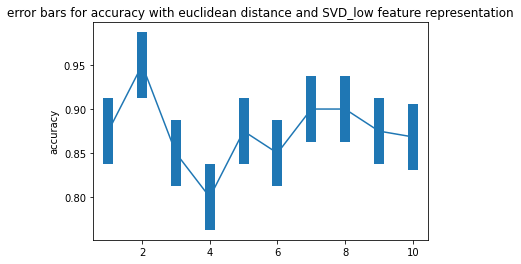

In [23]:
plt.errorbar(x=list(range(1,11)),y=accuracy_euclidean_SVD_low,yerr=np.std(accuracy_euclidean_SVD_low),elinewidth=10)
plt.ylabel("accuracy")
plt.title("error bars for accuracy with euclidean distance and SVD_low feature representation")
plt.show()

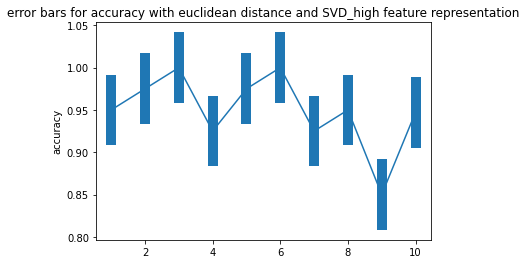

In [24]:
plt.errorbar(x=list(range(1,11)),y=accuracy_euclidean_SVD_high,yerr=np.std(accuracy_euclidean_SVD_high),elinewidth=10)
plt.ylabel("accuracy")
plt.title("error bars for accuracy with euclidean distance and SVD_high feature representation")
plt.show()

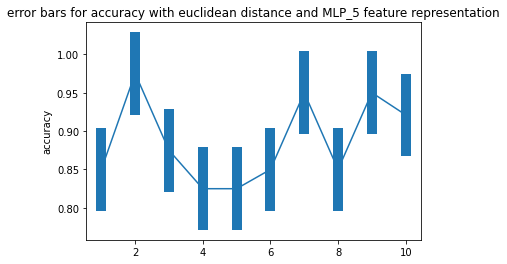

In [35]:
plt.errorbar(x=list(range(1,11)),y=accuracy_euclidean_MLP_5,yerr=np.std(accuracy_euclidean_MLP_5),elinewidth=10)
plt.ylabel("accuracy")
plt.title("error bars for accuracy with euclidean distance and MLP_5 feature representation")
plt.show()

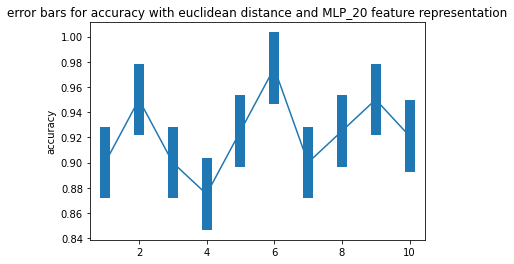

In [36]:
plt.errorbar(x=list(range(1,11)),y=accuracy_euclidean_MLP_20,yerr=np.std(accuracy_euclidean_MLP_20),elinewidth=10)
plt.ylabel("accuracy")
plt.title("error bars for accuracy with euclidean distance and MLP_20 feature representation")
plt.show()

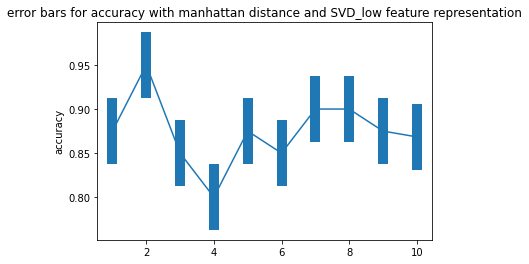

In [37]:
plt.errorbar(x=list(range(1,11)),y=accuracy_manhattan_SVD_low,yerr=np.std(accuracy_manhattan_SVD_low),elinewidth=10)
plt.ylabel("accuracy")
plt.title("error bars for accuracy with manhattan distance and SVD_low feature representation")
plt.show()

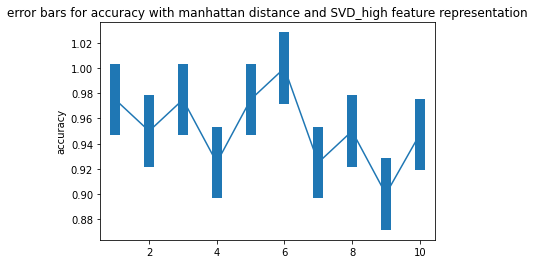

In [38]:
plt.errorbar(x=list(range(1,11)),y=accuracy_manhattan_SVD_high,yerr=np.std(accuracy_manhattan_SVD_high),elinewidth=10)
plt.ylabel("accuracy")
plt.title("error bars for accuracy with manhattan distance and SVD_high feature representation")
plt.show()

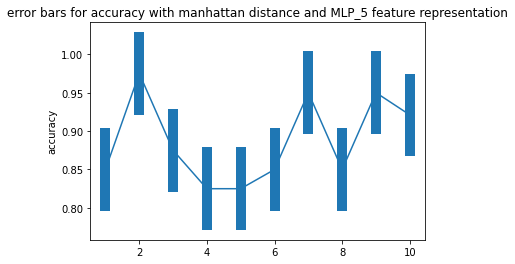

In [39]:
plt.errorbar(x=list(range(1,11)),y=accuracy_manhattan_MLP_5,yerr=np.std(accuracy_manhattan_MLP_5),elinewidth=10)
plt.ylabel("accuracy")
plt.title("error bars for accuracy with manhattan distance and MLP_5 feature representation")
plt.show()

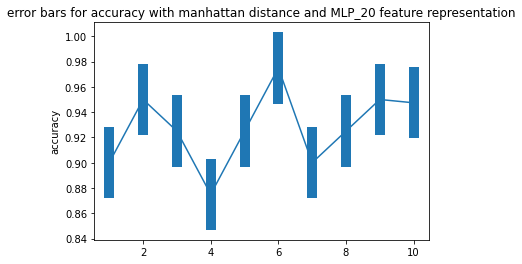

In [40]:
plt.errorbar(x=list(range(1,11)),y=accuracy_manhattan_MLP_20,yerr=np.std(accuracy_manhattan_MLP_20),elinewidth=10)
plt.ylabel("accuracy")
plt.title("error bars for accuracy with manhattan distance and MLP_20 feature representation")
plt.show()

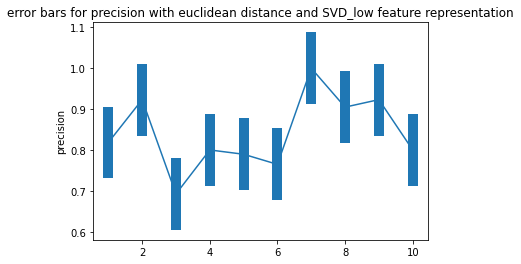

In [41]:
plt.errorbar(x=list(range(1,11)),y=precision_score_euclidean_SVD_low,yerr=np.std(precision_score_euclidean_SVD_low),elinewidth=10)
plt.ylabel("precision")
plt.title("error bars for precision with euclidean distance and SVD_low feature representation")
plt.show()

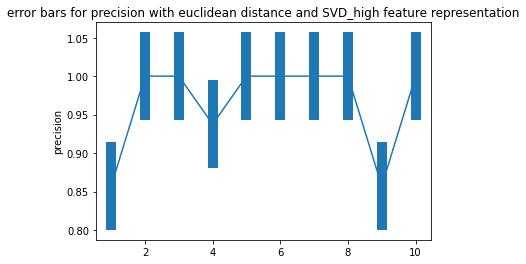

In [42]:
plt.errorbar(x=list(range(1,11)),y=precision_score_euclidean_SVD_high,yerr=np.std(precision_score_euclidean_SVD_high),elinewidth=10)
plt.ylabel("precision")
plt.title("error bars for precision with euclidean distance and SVD_high feature representation")
plt.show()

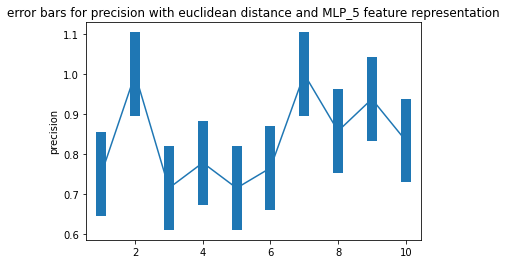

In [43]:
plt.errorbar(x=list(range(1,11)),y=precision_score_euclidean_MLP_5,yerr=np.std(precision_score_euclidean_MLP_5),elinewidth=10)
plt.ylabel("precision")
plt.title("error bars for precision with euclidean distance and MLP_5 feature representation")
plt.show()

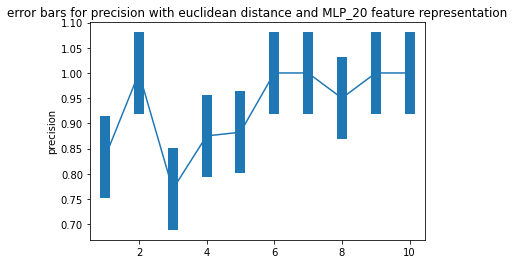

In [44]:
plt.errorbar(x=list(range(1,11)),y=precision_score_euclidean_MLP_20,yerr=np.std(precision_score_euclidean_MLP_20),elinewidth=10)
plt.ylabel("precision")
plt.title("error bars for precision with euclidean distance and MLP_20 feature representation")
plt.show()

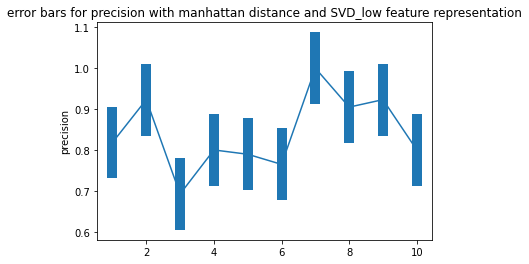

In [45]:
plt.errorbar(x=list(range(1,11)),y=precision_score_manhattan_SVD_low,yerr=np.std(precision_score_manhattan_SVD_low),elinewidth=10)
plt.ylabel("precision")
plt.title("error bars for precision with manhattan distance and SVD_low feature representation")
plt.show()

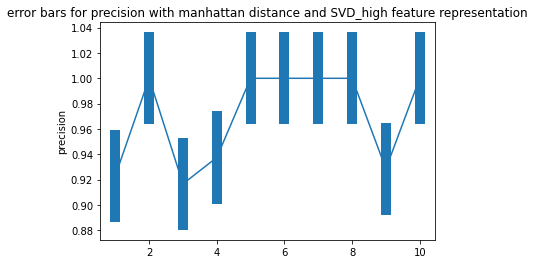

In [46]:
plt.errorbar(x=list(range(1,11)),y=precision_score_manhattan_SVD_high,yerr=np.std(precision_score_manhattan_SVD_high),elinewidth=10)
plt.ylabel("precision")
plt.title("error bars for precision with manhattan distance and SVD_high feature representation")
plt.show()

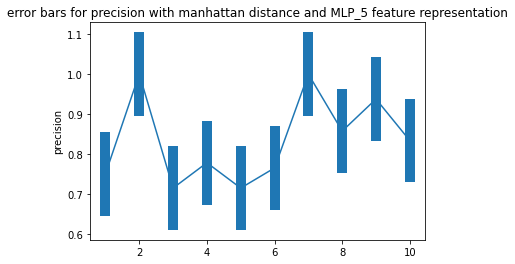

In [47]:
plt.errorbar(x=list(range(1,11)),y=precision_score_manhattan_MLP_5,yerr=np.std(precision_score_manhattan_MLP_5),elinewidth=10)
plt.ylabel("precision")
plt.title("error bars for precision with manhattan distance and MLP_5 feature representation")
plt.show()

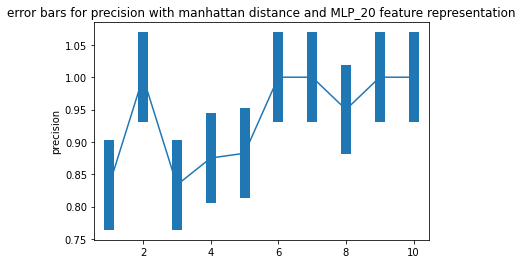

In [48]:
plt.errorbar(x=list(range(1,11)),y=precision_score_manhattan_MLP_20,yerr=np.std(precision_score_manhattan_MLP_20),elinewidth=10)
plt.ylabel("precision")
plt.title("error bars for precision with manhattan distance and MLP_20 feature representation")
plt.show()

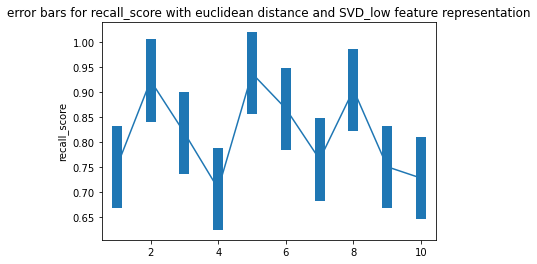

In [49]:
plt.errorbar(x=list(range(1,11)),y=recall_score_euclidean_SVD_low,yerr=np.std(recall_score_euclidean_SVD_low),elinewidth=10)
plt.ylabel("recall_score")
plt.title("error bars for recall_score with euclidean distance and SVD_low feature representation")
plt.show()

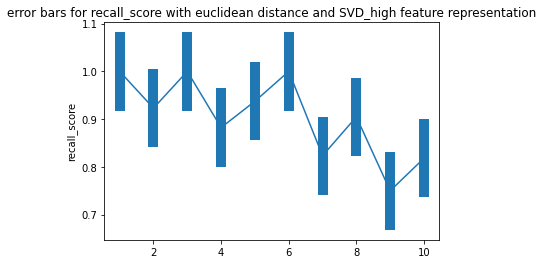

In [50]:
plt.errorbar(x=list(range(1,11)),y=recall_score_euclidean_SVD_high,yerr=np.std(recall_score_euclidean_SVD_high),elinewidth=10)
plt.ylabel("recall_score")
plt.title("error bars for recall_score with euclidean distance and SVD_high feature representation")
plt.show()

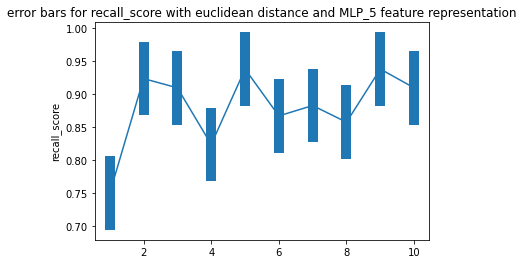

In [51]:
plt.errorbar(x=list(range(1,11)),y=recall_score_euclidean_MLP_5,yerr=np.std(recall_score_euclidean_MLP_5),elinewidth=10)
plt.ylabel("recall_score")
plt.title("error bars for recall_score with euclidean distance and MLP_5 feature representation")
plt.show()

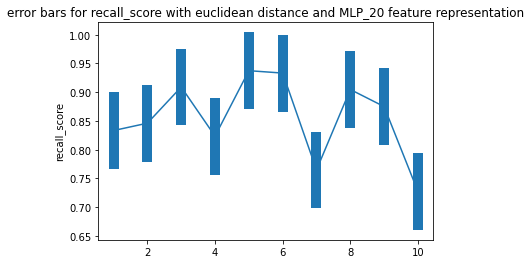

In [52]:
plt.errorbar(x=list(range(1,11)),y=recall_score_euclidean_MLP_20,yerr=np.std(recall_score_euclidean_MLP_20),elinewidth=10)
plt.ylabel("recall_score")
plt.title("error bars for recall_score with euclidean distance and MLP_20 feature representation")
plt.show()

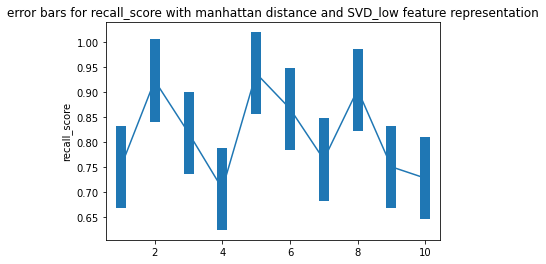

In [53]:
plt.errorbar(x=list(range(1,11)),y=recall_score_manhattan_SVD_low,yerr=np.std(recall_score_manhattan_SVD_low),elinewidth=10)
plt.ylabel("recall_score")
plt.title("error bars for recall_score with manhattan distance and SVD_low feature representation")
plt.show()

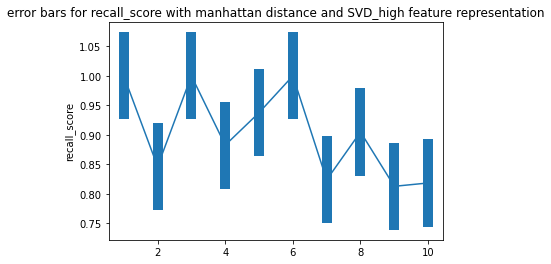

In [54]:
plt.errorbar(x=list(range(1,11)),y=recall_score_manhattan_SVD_high,yerr=np.std(recall_score_manhattan_SVD_high),elinewidth=10)
plt.ylabel("recall_score")
plt.title("error bars for recall_score with manhattan distance and SVD_high feature representation")
plt.show()

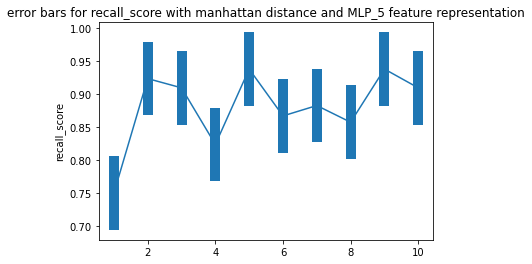

In [55]:
plt.errorbar(x=list(range(1,11)),y=recall_score_manhattan_MLP_5,yerr=np.std(recall_score_manhattan_MLP_5),elinewidth=10)
plt.ylabel("recall_score")
plt.title("error bars for recall_score with manhattan distance and MLP_5 feature representation")
plt.show()

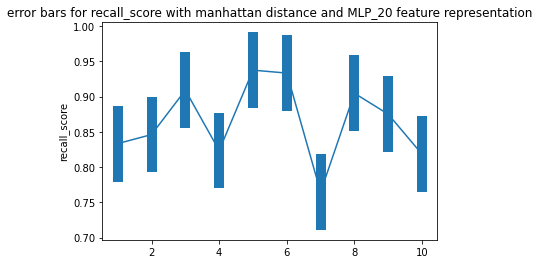

In [56]:
plt.errorbar(x=list(range(1,11)),y=recall_score_manhattan_MLP_20,yerr=np.std(recall_score_manhattan_MLP_20),elinewidth=10)
plt.ylabel("recall_score")
plt.title("error bars for recall_score with manhattan distance and MLP_20 feature representation")
plt.show()

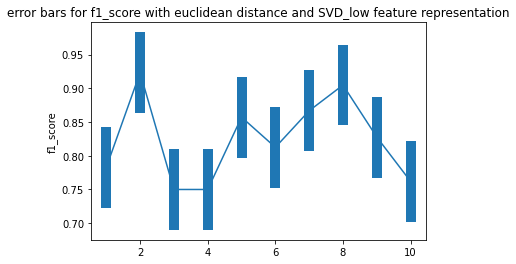

In [57]:
plt.errorbar(x=list(range(1,11)),y=f1_score_euclidean_SVD_low,yerr=np.std(f1_score_euclidean_SVD_low),elinewidth=10)
plt.ylabel("f1_score")
plt.title("error bars for f1_score with euclidean distance and SVD_low feature representation")
plt.show()

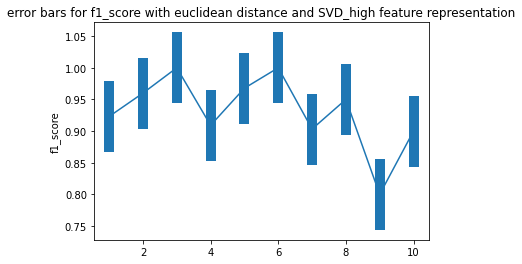

In [58]:
plt.errorbar(x=list(range(1,11)),y=f1_score_euclidean_SVD_high,yerr=np.std(f1_score_euclidean_SVD_high),elinewidth=10)
plt.ylabel("f1_score")
plt.title("error bars for f1_score with euclidean distance and SVD_high feature representation")
plt.show()

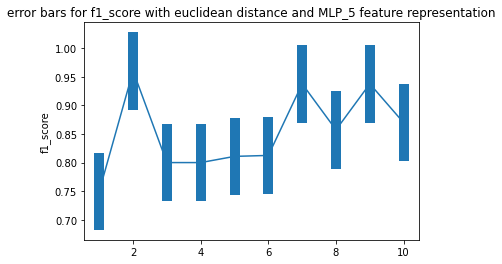

In [59]:
plt.errorbar(x=list(range(1,11)),y=f1_score_euclidean_MLP_5,yerr=np.std(f1_score_euclidean_MLP_5),elinewidth=10)
plt.ylabel("f1_score")
plt.title("error bars for f1_score with euclidean distance and MLP_5 feature representation")
plt.show()

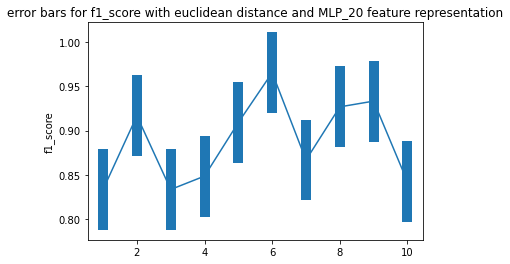

In [60]:
plt.errorbar(x=list(range(1,11)),y=f1_score_euclidean_MLP_20,yerr=np.std(f1_score_euclidean_MLP_20),elinewidth=10)
plt.ylabel("f1_score")
plt.title("error bars for f1_score with euclidean distance and MLP_20 feature representation")
plt.show()

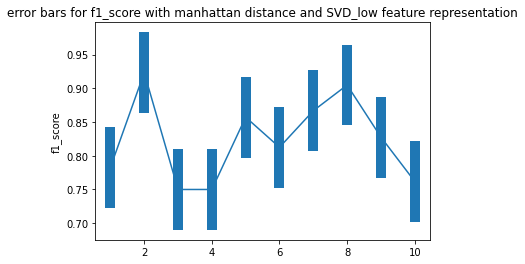

In [61]:
plt.errorbar(x=list(range(1,11)),y=f1_score_manhattan_SVD_low,yerr=np.std(f1_score_manhattan_SVD_low),elinewidth=10)
plt.ylabel("f1_score")
plt.title("error bars for f1_score with manhattan distance and SVD_low feature representation")
plt.show()

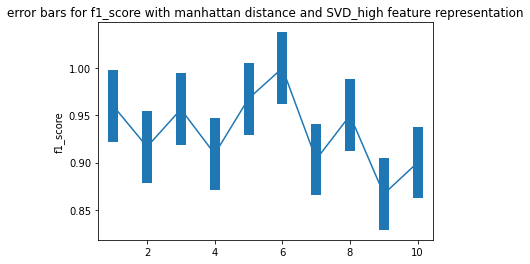

In [62]:
plt.errorbar(x=list(range(1,11)),y=f1_score_manhattan_SVD_high,yerr=np.std(f1_score_manhattan_SVD_high),elinewidth=10)
plt.ylabel("f1_score")
plt.title("error bars for f1_score with manhattan distance and SVD_high feature representation")
plt.show()

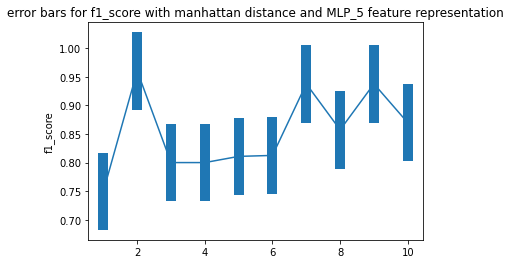

In [63]:
plt.errorbar(x=list(range(1,11)),y=f1_score_manhattan_MLP_5,yerr=np.std(f1_score_manhattan_MLP_5),elinewidth=10)
plt.ylabel("f1_score")
plt.title("error bars for f1_score with manhattan distance and MLP_5 feature representation")
plt.show()

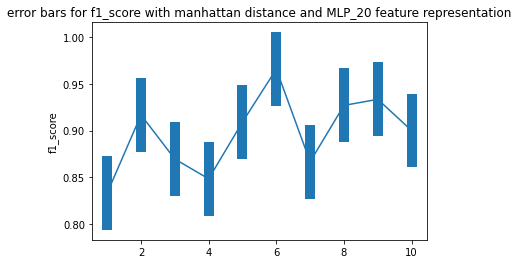

In [64]:
plt.errorbar(x=list(range(1,11)),y=f1_score_manhattan_MLP_20,yerr=np.std(f1_score_manhattan_MLP_20),elinewidth=10)
plt.ylabel("f1_score")
plt.title("error bars for f1_score with manhattan distance and MLP_20 feature representation")
plt.show()

Implementation correctness

In [25]:
import statistics
class my_knn():
    def __init__(self,k=3,distance="euclidean"):
        self.k=k
        self.distance=distance
    def dis(self,x,y):
        if self.distance=="euclidean":
            return np.sqrt(np.sum((x-y)**2))
        elif self.distance=="manhattan":
            return sum(abs(x[i] - y[i]) for i in range(len(x)))
    def fit(self,x,y):
        self.x=x
        self.y=y
        
    def predict(self,test):
        pred=[]
        for t in test:
            temp_dis=[]
            classes=[]
            for i in range(self.x.shape[0]):
                temp_dis.append(self.dis(self.x[i],t))
            temp_dis=np.array(temp_dis)
            
            top_indices = np.argsort(temp_dis)
            
            topk=top_indices[:self.k]
            
            for ind in topk:
                classes.append(self.y[ind])
            pred.append((statistics.mode(classes),topk))
        return pred

In [26]:
adf = pd.read_csv('arti_data.csv')
adf.head()

,Feature 1,Feature 2,Class/Cluster
0,0.020,0.0,1
1,1.045,0.0,1
2,2.080,0.0,1
3,3.125,0.0,1
4,4.180,0.0,1


In [27]:
y = adf["Class/Cluster"].values
x = adf.drop("Class/Cluster", axis = 1).values

In [28]:
import matplotlib.pyplot as plt

In [29]:
euc_knn=my_knn(k=3, distance="euclidean")
euc_knn.fit(x,y)
test=np.array([[1.4,3]])
value=euc_knn.predict(test)


In [30]:
c_map={1:"red",2:"blue"}
colors=[]
for i in y:
  colors.append(c_map[i])
fc=["none"]*x.shape[0]
for i in value[0][1]:
  fc[i]=colors[i]

Text(0.5, 1.0, 'Evaluation for Euclidean distance')

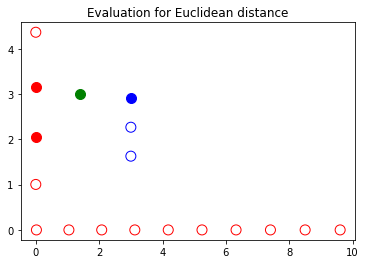

In [31]:
x_val=x[:,0]
y_val=x[:,1]

for i in range(len(x_val)):
    plt.scatter(x_val[i], y_val[i], s=100, facecolors=fc[i], edgecolors=colors[i])
plt.scatter(1.4,3,s=100,facecolors= "green",edgecolors="green")
plt.title("Evaluation for Euclidean distance")

In [32]:
man_knn=my_knn(k=3, distance="manhattan")
man_knn.fit(x,y)
test=np.array([[1.4,3]])
value=man_knn.predict(test)

In [33]:
c_map={1:"red",2:"blue"}
colors=[]
for i in y:
  colors.append(c_map[i])
fc=["none"]*x.shape[0]
for i in value[0][1]:
  fc[i]=colors[i]

Text(0.5, 1.0, 'Evaluation for Manhattan distance')

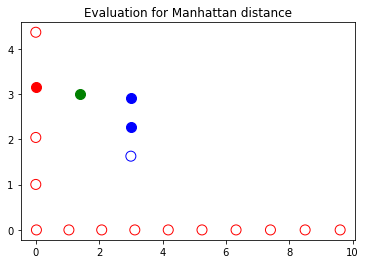

In [34]:
x_val=x[:,0]
y_val=x[:,1]

for i in range(len(x_val)):
    plt.scatter(x_val[i], y_val[i], s=100, facecolors=fc[i], edgecolors=colors[i])
plt.scatter(1.4,3,s=100,facecolors= "green",edgecolors="green")
plt.title("Evaluation for Manhattan distance")